# Credit Card Default

Using the **default of credit card clients** dataset from the UCI Machine Learning Repository I intend to explore this question.

There are many different forms of debt such as student loans, personal loans, credit cards and you don't have to venture very far to find it. At times, it seems like it is a fabric of life. I thought it would be interesting to see whether gender played a role in the credit limit issued particularly among those individuals who have defaulted on a 
debt payment.

Let's begin by importing a few libraries and creating the ```cc_debt``` dataframe so that we can explore the dataset.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [2]:
# Create dataframe
cc_debt = pd.read_csv('../data/default_of_credit_card_clients.csv', header=1)

In [3]:
# Explore first five records
cc_debt.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Explore last five records
cc_debt.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


Next, we'll execute ```cc_debt.info``` to see how many rows and columns there are, what the data types are and if any null values exist.

In [5]:
cc_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Above we see the following:
- 30,000 rows and 25 columns
- All columns have integer data type
- There are no null values

Next, we'll take a look at some descriptive statistics using ```cc_debt.info()```.

In [6]:
cc_debt.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Hypothesis and Null Hypothesis

The hypothesis we intend to explore further is _Do females who default on debt payments have higher credit limits on average than males who default on debt payments?_

In order to explore this hypothesis, the null hypothesis we will be using is _Do females who default on debt payments have same credit limits on average as males who default on debt payment?_

Let's continue by taking a look at the gender distribution amongst the 30,000 records.

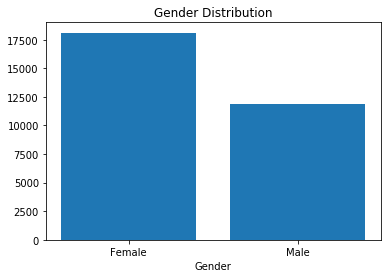

There are 18112 female records
There are 11888 male records


In [26]:
# Separate cc_debt by female and male
female = cc_debt[cc_debt['SEX'] == 2]
male = cc_debt[cc_debt['SEX'] == 1]

# Bar chart displaying female and male distribution 
gender = ('Female', 'Male')
y_position = [female.shape[0], male.shape[0]]
plt.bar(gender, y_position)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

# Print out the exact count for each gender
print('There are {} female records'.format(female.shape[0]))
print('There are {} male records'.format(male.shape[0]))

Now that the data is divided by gender, lets take a look to see how many males and females defaulted on payments and compare that against how many males and females didn't default on payments.

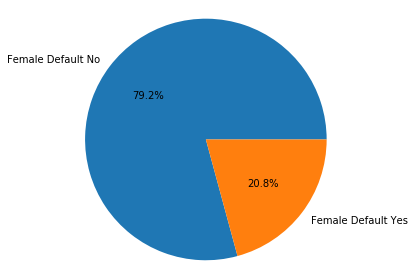

14349 females did not experience a default
3763 females did experience a default


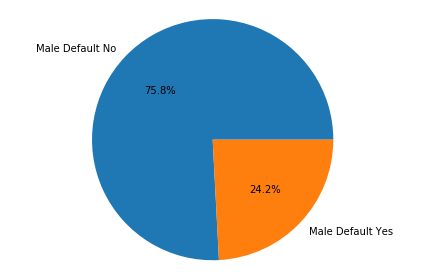

9015 males did not experience a default
2873 males did experience a default


In [28]:
# Females and males who did not default on a payment
female_default_no = female[female['default payment next month'] == 0]
male_default_no = male[male['default payment next month'] == 0]

# Females and males who defaulted on a paymen
female_default_yes = female[female['default payment next month'] == 1]
male_default_yes = male[male['default payment next month'] == 1]

# Ratio calculation
female_default_no_per = round((female_default_no.shape[0] / female.shape[0]) * 100, 2)
female_default_yes_per = round((female_default_yes.shape[0] / female.shape[0]) * 100, 2)
male_default_no_per = round((male_default_no.shape[0] / male.shape[0]) * 100, 2)
male_default_yes_per = round((male_default_yes.shape[0] / male.shape[0]) * 100, 2)

# Pie chart showing female distribution
pie_female_labels = ['Female Default No', 'Female Default Yes']
percent_female_values = [female_default_no_per, female_default_yes_per]
fig_female, ax_female = plt.subplots()
ax_female.pie(percent_female_values, labels=pie_female_labels, autopct='%1.1f%%')
ax_female.axis('equal')
plt.tight_layout()
plt.show()

# Print out the exact count for each
print('{} females did not experience a default'.format(female_default_no.shape[0]))
print('{} females did experience a default'.format(female_default_yes.shape[0]))

# Pie chart showing male distribution
pie_male_labels = ['Male Default No', 'Male Default Yes']
percent_male_values = [male_default_no_per, male_default_yes_per]
fig_male, ax_male = plt.subplots()
ax_male.pie(percent_male_values, labels=pie_male_labels, autopct='%1.1f%%')
ax_male.axis('equal')
plt.tight_layout()
plt.show()

# Print out the exact count for each
print('{} males did not experience a default'.format(male_default_no.shape[0]))
print('{} males did experience a default'.format(male_default_yes.shape[0]))

### Do females who default on debt payments have higher credit limits on average than males who default on debt payments?

[[Text(0, 0, 'female_default_yes'), Text(0, 0, 'male_default_yes')]]

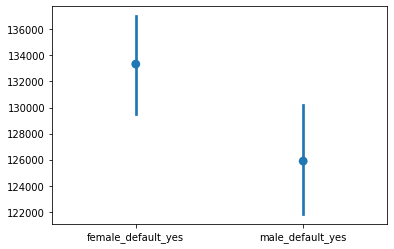

In [36]:
cc_point_plot = sns.pointplot(data=[female_default_yes['LIMIT_BAL'], male_default_yes['LIMIT_BAL']], join=False)
cc_point_plot.set(xticklabels = ['female_default_yes', 'male_default_yes'])

In [30]:
print('The average credit limit for females who experienced a default is {}'.format(female_default_yes['LIMIT_BAL'].mean()))
print('The average credit limit for males who experienced a default is {}'.format(male_default_yes['LIMIT_BAL'].mean()))
print('The difference between the average credit limits for females and males who experienced a default is {}'.format(female_default_yes['LIMIT_BAL'].mean() - male_default_yes['LIMIT_BAL'].mean()))

The average credit limit for females who experienced a default is 133327.13260696252
The average credit limit for males who experienced a default is 125895.46815175774
The difference between the average credit limits for females and males who experienced a default is 7431.66445520478


The pointplot graph tells us that females who defaulted on a debt payment have higher credit limits than males who defaulted on a debt payment. Let's now see if a ttest can be conducted and, if so, it supports the null hypothesis or not.

In order to know whether this dataset is a candidate for a ttest let's take a look at the data's normality by first reviewing the distribution and then a couple descriptive statistical measurements.

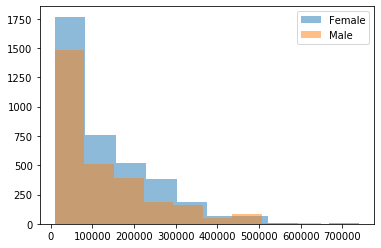

In [31]:
# Plot historgram to review data's distribution
plt.hist(female_default_yes['LIMIT_BAL'], alpha=0.5, label='Female')
plt.hist(male_default_yes['LIMIT_BAL'], alpha=0.5, label='Male')
plt.legend()
plt.show()

From the histogram above it appears the sample distribution does not fit a bell curve. Next, let's retrieve the exact measurements for skewness and kurtosis. A good rule of thumb is that anything with a kurtosis value from -2.5 to 2.5 and a skewness value from -1.5 to 1.5 is close enough for a t-test to work well.

In [32]:
print(stats.describe(female_default_yes['LIMIT_BAL']))
print(stats.describe(male_default_yes['LIMIT_BAL']))

DescribeResult(nobs=3763, minmax=(10000, 740000), mean=133327.13260696252, variance=12842249946.773212, skewness=1.3258448127628268, kurtosis=1.5830431598030543)
DescribeResult(nobs=2873, minmax=(10000, 720000), mean=125895.46815175774, variance=13901105650.90367, skewness=1.3921167705514355, kurtosis=1.544832299008002)


Both skewness and kurtosis for ```male_default_yes['LIMIT_BAL']``` and ```female_default_yes['LIMIT_BAL']``` fall within the range for a t-test, which we'll execute next.

In [33]:
stats.ttest_ind(female_default_yes['LIMIT_BAL'], male_default_yes['LIMIT_BAL'])

Ttest_indResult(statistic=2.6009462344363428, pvalue=0.009317336598633413)

From the t-test above, we see the p-value is less than 0.05 so we can reject the null hypothesis _Do females who default on debt payments have same credit limits on average as males who default on debt payment?_ and accept that a statistical significance exists between female and male average credit limits.

Let's now move on to taking a look at the confidence interval.

In [34]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(female_default_yes['LIMIT_BAL'], male_default_yes['LIMIT_BAL'])

'The difference in means at the 95% confidence interval (two-tail) is between -13061.780122250851 and -1801.5487881587087.'

Based on the confidence interval calculation, we find that the average credit limit difference is likely to be between 1,801.55 and 13,061.78.

## Conclusion and Recommendations

Out of the individuals who experienced a default, women on average tend to have higher credit limits than men. In addition, women are more likely to pay their debt obligations than men.

Recommendations for credit companies / businesses:
- Gender plays a role in creditworthiness and perspective / relationship with debt obligations
- When considering males for a credit limit increase, algorithms should include more approval criteria
- Women might make better credit card candidates than men